In [1]:
!pip install omdb

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import requests
import json
import omdb
import matplotlib.pyplot as plt

from pprint import pprint
from config import omdb_key

In [3]:
actors = pd.read_csv("Craig_portion/Resources/tmdb_5000_credits.csv")
actors.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
actor_name = input ("What actor would you like to know about?")

What actor would you like to know about?Will Smith


In [5]:
selected_actor = actors[actors["cast"].str.contains(actor_name)]
selected_actor = selected_actor.reset_index(drop=True)
moviecount = len(selected_actor.index)
print (str(actor_name) + " has been in " + str(moviecount) + " movies")

Will Smith has been in 25 movies


In [6]:
print (str(actor_name) + " has been in the following movies")
movies_played_in = pd.DataFrame(selected_actor["title"])
movies_played_in

Will Smith has been in the following movies


,title
0,Men in Black 3
1,Wild Wild West
2,Suicide Squad
3,Hancock
4,I Am Legend
5,Men in Black II
6,Bad Boys II
7,After Earth
8,Ali
9,"I, Robot"


In [7]:
#Access the data from Omdb
print("Beginning Data Retrieval")
print("---------------------------------------------------------------")

Metascore = {"metascore": [],
             "year released": []}

for movie in selected_actor["title"]:
         
    url = "http://www.omdbapi.com/?t=%s&apikey=%s" % (movie, omdb_key)
    
    #Print log of movie being processed
    print(f"Now retrieving Movie Data for: " + movie)
    print(url)
    
    #Run requests to API
    movie_data = requests.get(url).json()

    Metascore["metascore"].append(movie_data["Metascore"])
    Metascore["year released"].append(movie_data["Year"])
       
    pprint(movie_data)    

Beginning Data Retrieval
---------------------------------------------------------------
Now retrieving Movie Data for: Men in Black 3
http://www.omdbapi.com/?t=Men in Black 3&apikey=47006815
{'metascore': ['58'], 'year released': ['2012']}
{'Actors': 'Will Smith, Tommy Lee Jones, Josh Brolin, Jemaine Clement',
 'Awards': '1 win & 13 nominations.',
 'BoxOffice': '$179,020,854',
 'Country': 'USA',
 'DVD': '30 Nov 2012',
 'Director': 'Barry Sonnenfeld',
 'Genre': 'Action, Adventure, Comedy',
 'Language': 'English, Ukrainian',
 'Metascore': '58',
 'Plot': "Agent J travels in time to M.I.B.'s early days in 1969 to stop an "
         'alien from assassinating his friend Agent K and changing history.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BMTU2NTYxODcwMF5BMl5BanBnXkFtZTcwNDk1NDY0Nw@@._V1_SX300.jpg',
 'Production': 'Sony Pictures',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '6.8/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '68%'},


{'metascore': ['58', '38', '40', '49', '65', '49', '38'], 'year released': ['2012', '1999', '2016', '2008', '2007', '2002', '2003']}
{'Actors': 'Martin Lawrence, Will Smith, Jordi Mollà, Gabrielle Union',
 'Awards': '5 wins & 13 nominations.',
 'BoxOffice': '$138,396,624',
 'Country': 'USA',
 'DVD': '09 Dec 2003',
 'Director': 'Michael Bay',
 'Genre': 'Action, Comedy, Crime',
 'Language': 'English, Spanish',
 'Metascore': '38',
 'Plot': 'Two loose-cannon narcotics cops investigate the flow of Ecstasy into '
         'Florida from a Cuban drug cartel.',
 'Poster': 'https://images-na.ssl-images-amazon.com/images/M/MV5BZmU4NzVkZjEtZmQxMi00ZDY5LWI3ZDYtMWRmZjE5YmYwZjQzXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SX300.jpg',
 'Production': 'Sony Pictures Entertainment',
 'Rated': 'R',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '6.6/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '23%'},
             {'Source': 'Metacritic', 'Value': '38/100'}],
 'Released': '18 Jul 2003',
 'Re

{'metascore': ['58', '38', '40', '49', '65', '49', '38', '33', '65', '59', '71', '67', '59'], 'year released': ['2012', '1999', '2016', '2008', '2007', '2002', '2003', '2013', '2001', '2004', '1997', '1998', '1996']}
{'Actors': 'Will Smith, Bill Pullman, Jeff Goldblum, Mary McDonnell',
 'Awards': 'Won 1 Oscar. Another 34 wins & 34 nominations.',
 'BoxOffice': 'N/A',
 'Country': 'USA',
 'DVD': '27 Jun 2000',
 'Director': 'Roland Emmerich',
 'Genre': 'Action, Adventure, Sci-Fi',
 'Language': 'English',
 'Metascore': '59',
 'Plot': 'The aliens are coming and their goal is to invade and destroy Earth. '
         "Fighting superior technology, mankind's best weapon is the will to "
         'survive.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BMGQwNDNkMmItYWY1Yy00YTZmLWE5OTAtODU0MGZmMzQ1NDdkXkEyXkFqcGdeQXVyMTQxNzMzNDI@._V1_SX300.jpg',
 'Production': '20th Century Fox',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.0/10'},
             {'Source': 

{'metascore': ['58', '38', '40', '49', '65', '49', '38', '33', '65', '59', '71', '67', '59', '48', '56', '47', '31', '58', '64'], 'year released': ['2012', '1999', '2016', '2008', '2007', '2002', '2003', '2013', '2001', '2004', '1997', '1998', '1996', '2004', '2015', '2000', '2014', '2005', '2006']}
{'Actors': 'Will Smith, Jaden Smith, Thandie Newton, Brian Howe',
 'Awards': 'Nominated for 1 Oscar. Another 11 wins & 24 nominations.',
 'BoxOffice': '$162,586,036',
 'Country': 'USA',
 'DVD': '27 Mar 2007',
 'Director': 'Gabriele Muccino',
 'Genre': 'Biography, Drama',
 'Language': 'English, Cantonese',
 'Metascore': '64',
 'Plot': "A struggling salesman takes custody of his son as he's poised to "
         'begin a life-changing professional career.',
 'Poster': 'https://images-na.ssl-images-amazon.com/images/M/MV5BMTQ5NjQ0NDI3NF5BMl5BanBnXkFtZTcwNDI0MjEzMw@@._V1_SX300.jpg',
 'Production': 'Sony Pictures',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '8.

 'Awards': 'Nominated for 1 Golden Globe. Another 4 wins & 15 nominations.',
 'BoxOffice': '$23,268,108',
 'Country': 'UK, Australia, USA',
 'DVD': '29 Mar 2016',
 'Director': 'Peter Landesman',
 'Genre': 'Biography, Drama, Sport',
 'Language': 'English',
 'Metascore': '55',
 'Plot': 'In Pittsburgh, accomplished pathologist Dr. Bennet Omalu uncovers '
         'the truth about brain damage in football players who suffer repeated '
         'concussions in the course of normal play.',
 'Poster': 'https://ia.media-imdb.com/images/M/MV5BMTYwNjgwNDg0NV5BMl5BanBnXkFtZTgwMzY1MjAyNzE@._V1_SX300.jpg',
 'Production': 'Sony Pictures',
 'Rated': 'PG-13',
 'Ratings': [{'Source': 'Internet Movie Database', 'Value': '7.1/10'},
             {'Source': 'Rotten Tomatoes', 'Value': '60%'},
             {'Source': 'Metacritic', 'Value': '55/100'}],
 'Released': '25 Dec 2015',
 'Response': 'True',
 'Runtime': '123 min',
 'Title': 'Concussion',
 'Type': 'movie',
 'Website': 'http://www.concussion-movie.com

In [8]:
met_release = pd.DataFrame(Metascore)
met_release.head()

,metascore,year released
0,58,2012
1,38,1999
2,40,2016
3,49,2008
4,65,2007


NameError: name 'ylim' is not defined

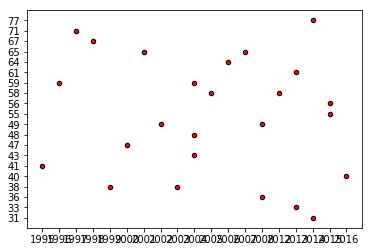

In [9]:
plt.scatter(met_release["year released"], met_release["metascore"], marker= "o", facecolors= "red",
            edgecolor= "black", label= "Will Smith Movies", s= 20)

ylim

# Ignore below

In [ ]:
# Read and display the CSV with Pandas 
movies = pd.read_csv("Craig_portion/Resources/tmdb_5000_movies.csv")
movies_df = pd.DataFrame(movies)

#Create df for movie titles and display
movie_info = pd.DataFrame(movies_df[["title",
                                     "release_date",
                                     "revenue",
                                     "runtime",
                                     "overview",
                                     "tagline"]])

movie_info_final = movie_info.rename(index=str, columns={"title": "Movie Title",
                                      "release_date": "Released",
                                      "revenue": "Revenue",
                                      "runtime": "Length (min)",
                                      "overview": "Brief Description",
                                      "tagline": "Tagline"})
movie_info_final.head()

In [ ]:
movie_title = input("What movie are you looking for? ")

In [ ]:
#Access the data from Omdb
print("Beginning Data Retrieval")
print("---------------------------------------------------------------")
     
url = "http://www.omdbapi.com/?t=%s&apikey=%s" % (movie_title, omdb_key)
    
#Print log of movie being processed
print(f"Now retrieving Movie Title #" + str(index) + ": " + movie_title)
print(url)
    
#Run requests to API
movie_data = requests.get(url).json()

pprint(movie_data)

In [ ]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

for row in movie_info_final["Brief Description"]:
    # Run analysis
    compound = analyzer.polarity_scores(row)["compound"]
    pos = analyzer.polarity_scores(row)["pos"]
    neu = analyzer.polarity_scores(row)["neu"]
    neg = analyzer.polarity_scores(row)["neg"]

# Print Analysis
print(row)
print("Compound Score: %s" % compound)
print("Positive Score: %s" % pos)
print("Neutral Score: %s" % neu)
print("Negative Score: %s" % neg)

In [ ]:
#Export DataFrame as CSV
#movie_info.to_csv("basic_movie_info.csv")